<a href="https://colab.research.google.com/github/IaraSelva/machine_learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Car_Price.csv to Car_Price.csv


In [2]:
# import required libraries

import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importing CarPrice_Assignment.csv with pandas

CarData= pd.read_csv('Car_Price.csv')

CarData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# shape of the dataset
print("Shape of the dataset:", CarData.shape)

Shape of the dataset: (205, 26)


In [5]:
# Display general information about the dataset
# This includes the count of non-null entries per column, the data type of each column, and memory usage.
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Generate descriptive statistics for numerical columns
# Provide information like mean, standard deviation, min, max, and quartiles.
CarData.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Extract the car's company's name from the variable 'CarName' into the variable 'CarCompany'

CarData['CarCompany'] = CarData['CarName'].str.split().str[0]

CarData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
# #checking the unique values under "CarCompany"
unique_car_companies = CarData['CarCompany'].unique()
print(tabulate(enumerate(unique_car_companies, start=1), headers=['Index', 'Car Company']))

  Index  Car Company
-------  -------------
      1  alfa-romero
      2  audi
      3  bmw
      4  chevrolet
      5  dodge
      6  honda
      7  isuzu
      8  jaguar
      9  maxda
     10  mazda
     11  buick
     12  mercury
     13  mitsubishi
     14  Nissan
     15  nissan
     16  peugeot
     17  plymouth
     18  porsche
     19  porcshce
     20  renault
     21  saab
     22  subaru
     23  toyota
     24  toyouta
     25  vokswagen
     26  volkswagen
     27  vw
     28  volvo


In [9]:
# replacing the mis-spelling with correct ones

corrections = {
    'isuzu' : 'suzuki',
    'maxda' : 'mazda',
    'porcshce' : 'porsche',
    'toyouta' : 'toyota',
    'vokswagen' : 'volkswagen',
    'vw' : 'volkswagen'
}

CarData['CarCompany'] = CarData['CarCompany'].map(corrections).fillna(CarData['CarCompany']).str.capitalize()

# ordering by name and adding a count
car_company_counts = CarData['CarCompany'].value_counts().reset_index()
car_company_counts.columns = ['Car Company', 'Count']
car_company_counts_sorted = car_company_counts.sort_values(by='Car Company')

# again checking the unique values
unique_car_companies = CarData.CarCompany.unique()
print(car_company_counts_sorted.to_string(index=False)) # printing without index collumn

# Calculate the sum of counts
total_count = car_company_counts_sorted['Count'].sum()
print(f"\n  Total Count: {total_count}")



Car Company  Count
Alfa-romero      3
       Audi      7
        Bmw      8
      Buick      8
  Chevrolet      3
      Dodge      9
      Honda     13
     Jaguar      3
      Mazda     17
    Mercury      1
 Mitsubishi     13
     Nissan     18
    Peugeot     11
   Plymouth      7
    Porsche      5
    Renault      2
       Saab      6
     Subaru     12
     Suzuki      4
     Toyota     32
 Volkswagen     12
      Volvo     11

  Total Count: 205


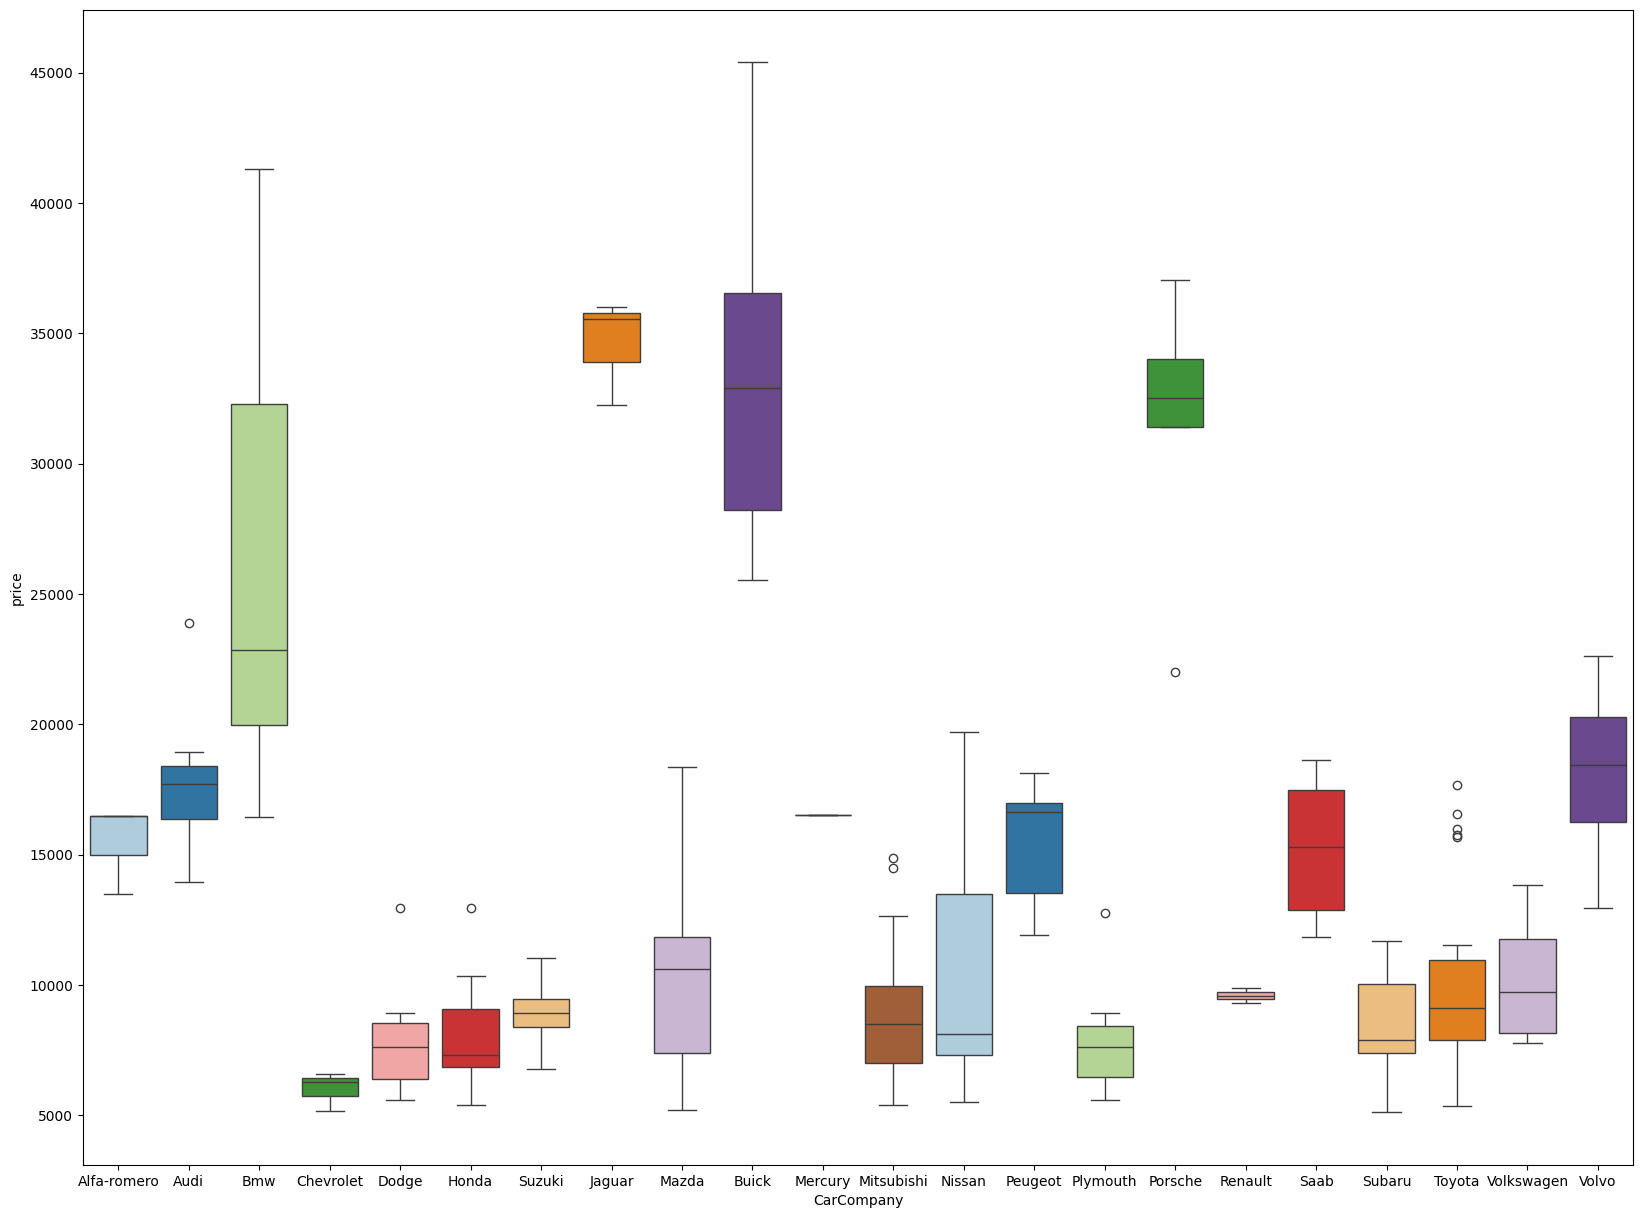

In [10]:
# Visualising 'CarComapny' variable aginst dependent variable 'price' via boxplot

plt.figure(figsize=(20, 15)) # 12 de largura e 8 de altura
sns.boxplot(data=CarData, x="CarCompany", y="price", hue='CarCompany', palette='Paired', legend=False)
plt.show()

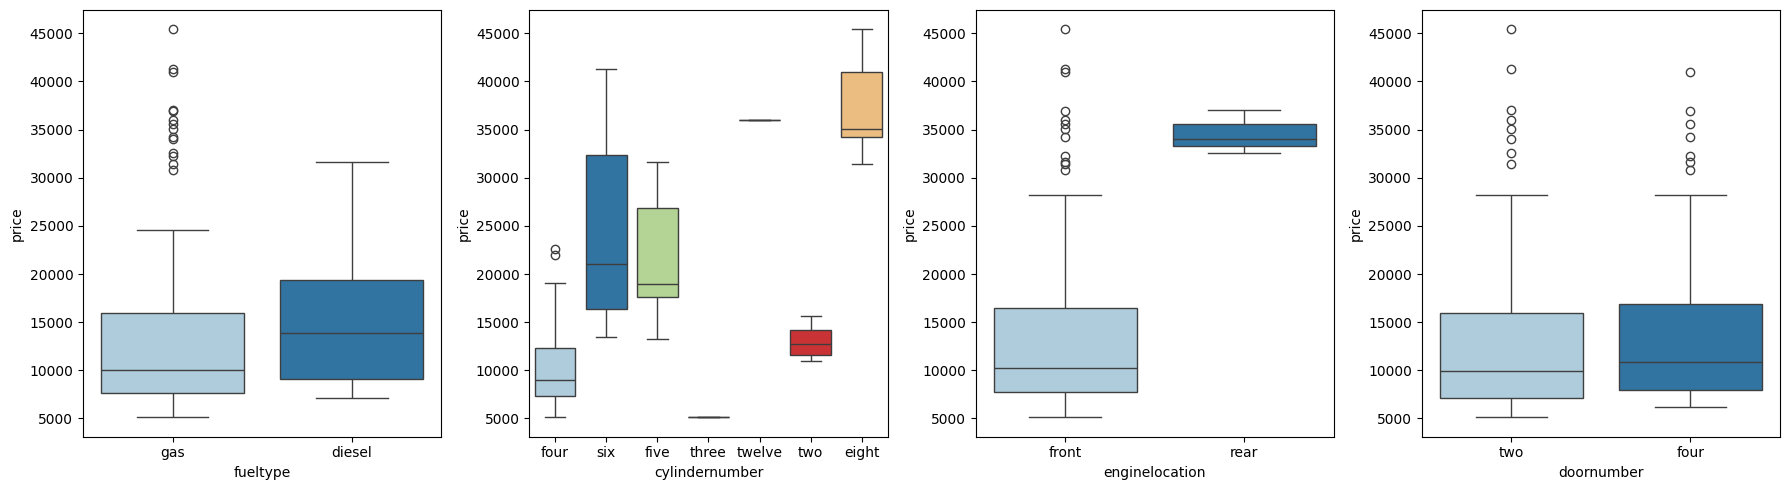

In [11]:
# Visualising Categorical variables through boxplots

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.boxplot(data=CarData, x='fueltype', y='price', ax=axes[0], palette='Paired', hue='fueltype', legend=False)

sns.boxplot(data=CarData, x='cylindernumber', y='price', ax=axes[1], palette='Paired', hue='cylindernumber', legend=False)

sns.boxplot(data=CarData, x='enginelocation', y='price', ax=axes[2],palette='Paired', hue='enginelocation', legend=False)

sns.boxplot(data=CarData, x='doornumber', y='price', ax=axes[3], palette='Paired', hue='doornumber', legend=False)

plt.tight_layout()

plt.show()

In [12]:
#creating a dict 'company price' where key = car's company and value = median of their price

company_price = CarData.groupby('CarCompany')['price'].median().to_dict()
df = pd.DataFrame(list(company_price.items()), columns=['Company', 'Price'])
print(df.to_string(index=False))

    Company   Price
Alfa-romero 16500.0
       Audi 17710.0
        Bmw 22835.0
      Buick 32892.0
  Chevrolet  6295.0
      Dodge  7609.0
      Honda  7295.0
     Jaguar 35550.0
      Mazda 10595.0
    Mercury 16503.0
 Mitsubishi  8499.0
     Nissan  8124.0
    Peugeot 16630.0
   Plymouth  7609.0
    Porsche 32528.0
    Renault  9595.0
       Saab 15275.0
     Subaru  7894.0
     Suzuki  8916.5
     Toyota  9103.0
 Volkswagen  9737.5
      Volvo 18420.0


In [13]:
# division in the buckets of low i.e. below 10000, medium i.e. range b/w 10000 and 20000 and high i.e. above 20000

# Define the bins for the price categories
price_bins = [-float("inf"), 10000, 20000, float("inf")]

# Define the labels for the price categories
price_labels = ['low', 'medium', 'high']


# mapping the company_price on the 'CarCompany' column in the dataset
CarData['CarCompany'] = pd.cut(CarData['price'], bins=price_bins, labels=price_labels, right=False)

# checking the column's unique values
car_company = CarData['CarCompany'].unique()
print("CarCompany unique values:", car_company)


CarData.head()



CarCompany unique values: ['medium', 'high', 'low']
Categories (3, object): ['low' < 'medium' < 'high']


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,medium


In [14]:
# creating dummy variable for categorical variables
CarData = CarData.drop(['car_ID', 'CarName'], axis=1)
CarData = pd.get_dummies(CarData, drop_first=True).astype(float)

# checking the dataset
CarData.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_medium,CarCompany_high
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
# importing required library
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
random_state = 42
CarData_train, CarData_test = train_test_split(CarData, test_size=0.2, random_state=random_state)

# shape of the train and test sets
print(CarData_train.shape)
print(CarData_test.shape)

(164, 46)
(41, 46)


In [16]:
#importing required function for scaling

from sklearn.preprocessing import MinMaxScaler

def scale_features(train_data, test_data):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler on the training data and transform it
    train_scaled = scaler.fit_transform(train_data)

    # Transform the test data using the scaler fitted on the training data
    test_scaled = scaler.transform(test_data)

    return train_scaled, test_scaled

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the training and test data for the target variable (y) and features (X)
y = CarData['price']
X = CarData.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Train your model
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Making predictions
predicted_price = model.predict(X_test)

In [20]:
# Show predictions
predicted_price

array([30178.09769693, 19179.95006563, 10341.60827491, 12914.67589709,
       29410.39330237,  5544.15656858,  8466.31903398,  6998.79281892,
       10845.48710567,  8905.83447421, 15297.1343943 ,  6691.71486045,
       17444.60773928,  8261.27484275, 44013.29327892,  6675.45146465,
        1461.23243615, 14014.33817309,  9764.06896604,  9101.23027331,
        9745.86942518, 16325.28054903,  5432.86575595,  3935.16123963,
        7131.42974491, 29874.93411608, 10458.74187918, 15496.58665431,
        5830.75597003, 15621.29617966, 29591.65799915,  6590.8622514 ,
        7274.86951762, 26418.27941287,  6582.53128808, 27682.06647275,
       13907.35287331, 12742.15100056,  6809.51006776, 14095.47579411,
        7169.32795674])

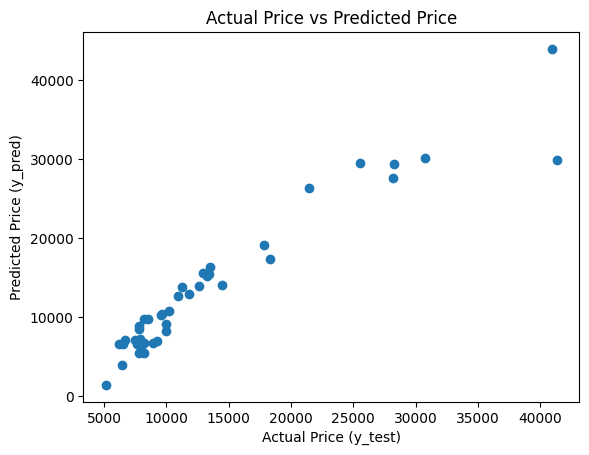

In [21]:
# Plotting y_test and y_pred to understand the spread.
plt.scatter(y_test, predicted_price)
plt.xlabel('Actual Price (y_test)')
plt.ylabel('Predicted Price (y_pred)')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predicted_price)
print("R2 Score:", r2)

R2 Score: 0.9118805139995105
